### Problem 5

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(a)

In [11]:
titanic = pd.read_csv('titanic_training.csv')

In [12]:
titanic.drop(['cabin','ticket'], axis=1, inplace=True)

In [13]:
for column in titanic.columns:
    titanic[column].fillna(titanic[column].mode()[0], inplace=True)

(b)

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
titanic[['survived', 'pclass','sex','parch','embarked']] = \
        titanic[['survived', 'pclass','sex','parch','embarked']].apply(lambda x: le.fit_transform(x))

In [68]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,1,22.0,0.0,0,8.0500,2
1,0,0,1,22.0,0.0,0,135.6333,0
2,0,1,1,23.0,0.0,0,15.0458,0
3,0,1,1,42.0,0.0,0,13.0000,2
4,0,2,1,20.0,0.0,0,9.8458,2
...,...,...,...,...,...,...,...,...
995,0,2,1,16.0,0.0,0,7.7750,2
996,1,2,1,22.0,0.0,0,7.2250,0
997,0,1,1,63.0,1.0,0,26.0000,2
998,0,2,0,41.0,0.0,5,39.6875,2


In [69]:
titanic.iloc[:,1:]

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,22.0,0.0,0,8.0500,2
1,0,1,22.0,0.0,0,135.6333,0
2,1,1,23.0,0.0,0,15.0458,0
3,1,1,42.0,0.0,0,13.0000,2
4,2,1,20.0,0.0,0,9.8458,2
...,...,...,...,...,...,...,...
995,2,1,16.0,0.0,0,7.7750,2
996,2,1,22.0,0.0,0,7.2250,0
997,1,1,63.0,1.0,0,26.0000,2
998,2,0,41.0,0.0,5,39.6875,2


In [72]:
X_train, X_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic.iloc[:,0], test_size=0.20, 
                                                    random_state=0)

(c)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [74]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [75]:
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [76]:
accuracy_score(y_test,clf_gini.predict(X_test))

0.83

In [77]:
accuracy_score(y_test,clf_entropy.predict(X_test))

0.815

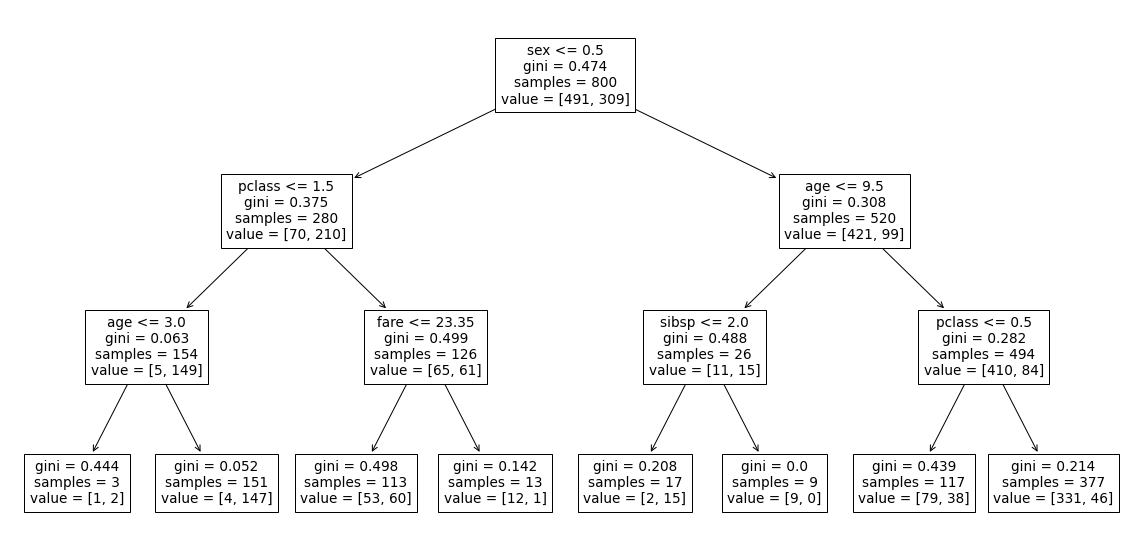

In [78]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini,feature_names=X_train.columns.tolist())
plt.show()

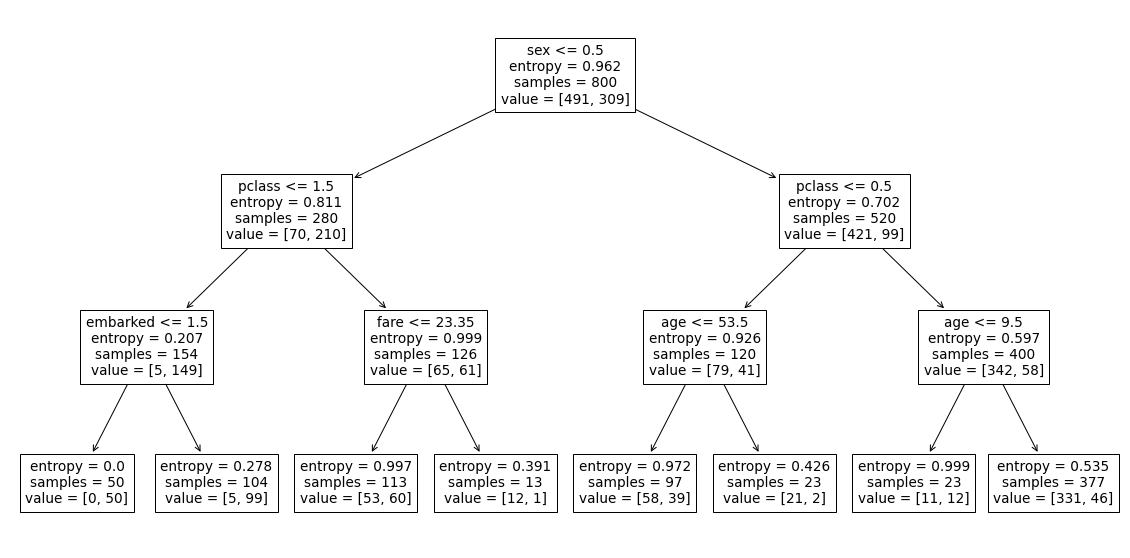

In [79]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy,feature_names=X_train.columns.tolist())
plt.show()

In [ ]:
#The two trees look pretty similar but are slightly different at the 3nd level, 
#The greedy algorithm may only reach the local optimal results and sometimes will be unable 
#to reach the general optimal results. However, although they may always not reach the globally optimal results,
#this decision trees are still quite able to capture the datasets

(d) Train a decision tree of depth 4 with the other parameters having default values. Compare it
with the gini tree obtained above, both in interpretation and test error. Once again, comment
on what this says about the suitability of the tree model.

In [80]:
clf_4 = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf_4.fit(X_train, y_train)
accuracy_score(y_test,clf_4.predict(X_test))

0.755

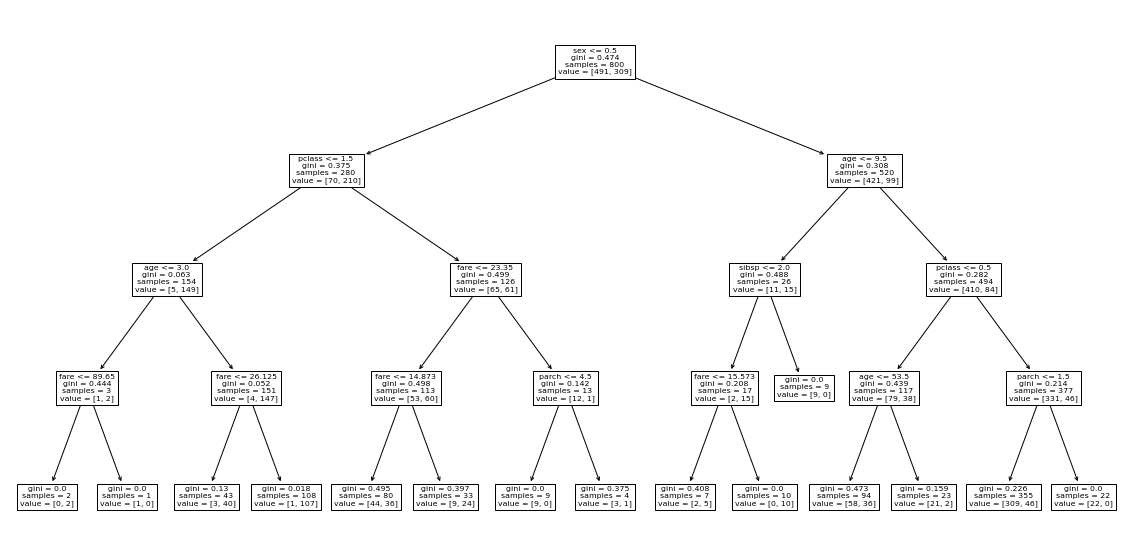

In [81]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_4,feature_names=X_train.columns.tolist())
plt.show()

In [ ]:
# There are 4 depth now in the decision model and some of the nodes are quite similar to the model with 3 depth
# but the test accuracy score is lower for the decision tree model with 4 depth than the model with 3 depth above
# so it is likely that the model is overfitted and it is less suitable than the model with 3 depth above

(e) Train a random forest classifier on this data and compare its test error with the decision tree
classifier(s) from above. Plot the test error as a function of the number of trees used; do you
see overfitting occurring?

In [88]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [89]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
n_trees = []
accuracy_list = []
losses_list = []
for i in range(1, 50):
    clf_random_forest = RandomForestClassifier(n_estimators=i)
    clf_random_forest.fit(X_train, y_train)
    
    losses = log_loss(y_test,clf_random_forest.predict(X_test))
    accu = accuracy_score(y_test,clf_random_forest.predict(X_test))
    
    n_trees.append(i) 
    accuracy_list.append(accu)
    losses_list.append(losses)

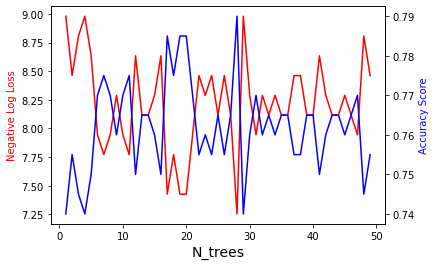

In [94]:
fig,ax = plt.subplots()
# make a plot
ax.plot(n_trees, losses_list, color="red")
# set x-axis label
ax.set_xlabel("N_trees",fontsize=14)
# set y-axis label
ax.set_ylabel("Negative Log Loss",color="red")

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(n_trees, accuracy_list,color="blue")
ax2.set_ylabel("Accuracy Score",color="blue")
plt.show()

In [ ]:
# The accuracy scores on the test data are no more significantly higher than decision tree models used above
# The losses and scores tend to be relatively stable. However, with more trees, 
# the accuracy scores seem to be slightly decreasing, so it is likely that overfitting occurs
